<a href="https://colab.research.google.com/github/Latamila/Scikit-learn_estudos_casos/blob/main/DecisionTree_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problemas de classificação


`Problemas em que cada entrada deve receber uma categoria discreta` (também chamada de rótulo ou classe) são conhecidos como  `problemas de classificação`.


**Aqui estão alguns exemplos de problemas de classificação**:

- Previsão de chuva : prever se choverá amanhã usando os dados meteorológicos de hoje (as classes são "Will Rain" e "Will Not Rain"). https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

- Detecção de câncer de mama : prever se um tumor é “benigno” (não canceroso) ou “maligno” (canceroso) usando informações como raio, textura, etc. https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

- Previsão de reembolso de empréstimo - prever se os solicitantes pagarão um empréstimo residencial com base em fatores como idade, renda, valor do empréstimo, no. de crianças etc. https://www.kaggle.com/c/home-credit-default-risk

- Reconhecimento de dígitos manuscritos - Identifica qual dígito de 0 a 9 representa uma imagem de texto manuscrito. https://www.kaggle.com/c/digit-recognizer


Você consegue pensar em mais alguns problemas de classificação?

EXERCÍCIO : Replique as etapas seguidas neste tutorial com cada um dos conjuntos de dados acima.

Os problemas de classificação podem ser binários (sim/não) ou multiclasse (escolhendo uma das muitas classes).

Os seguintes tópicos são abordados neste tutorial:

- Baixando um conjunto de dados do mundo real do Kaggle
- Análise exploratória e visualização de dados
- Dividindo um conjunto de dados em conjuntos de treinamento, validação e teste
- Preenchendo/imputando valores ausentes em colunas numéricas
- Dimensionando recursos numéricos para um
(0,1)faixa
- Codificando colunas categóricas como vetores one-hot
- Treinando um modelo de regressão logística usando Scikit-learn
- Avaliando um modelo usando um conjunto de validação e um conjunto de teste
- Salvando um modelo em disco e carregando-o de volta

`Este tutorial adota uma abordagem prática e focada na codificação.`

 Aprenderemos como aplicar regressão logística a um conjunto de dados do mundo real do Kaggle :

#PERGUNTA :

O conjunto de dados Rain in Australia contém cerca de 10 anos de observações meteorológicas diárias de várias estações meteorológicas australianas.

Como cientista de dados do Bureau of Meteorology, você tem a `tarefa de criar um sistema totalmente automatizado` que possa usar os dados meteorológicos atuais de um determinado local `para prever se choverá no local amanhã.`

#Regressão Linear vs. Regressão Logística

No tutorial anterior , tentamos prever as despesas médicas anuais de uma pessoa usando regressão linear .

Neste tutorial, usaremos regressão logística , `que é mais adequada para problemas de classificação` , como prever se choverá
amanhã.

`Identificar se um determinado problema é um problema de classificação ou regressão é um primeiro passo` importante no aprendizado de máquina.



#Regressão Linear para Resolver Problemas de Regressão

A regressão linear é uma técnica comumente usada para resolver problemas de regressão. Num modelo de regressão linear, o alvo é modelado como uma combinação linear (ou soma ponderada) de características de entrada.

As previsões do modelo são avaliadas usando uma função de perda como o Root Mean Squared Error (RMSE).

Aqui está um resumo visual de como um modelo de regressão linear é estruturado:

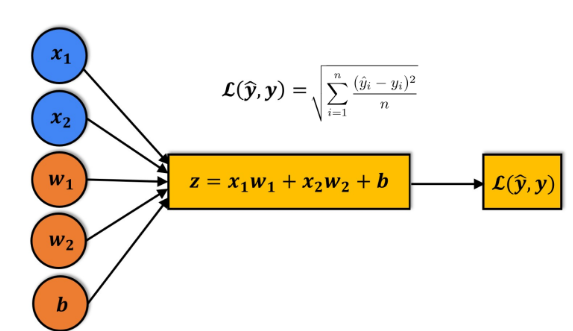

#Regressão Logística para Resolver Problemas de Classificação


A regressão logística é uma técnica comumente usada para resolver problemas de classificação binária. Em um modelo de regressão logística:

- pegamos a combinação linear (ou soma ponderada dos recursos de entrada)
- aplicamos a função sigmóide ao resultado para obter um número entre 0 e 1
- este número representa a probabilidade da entrada ser classificada como "Sim"
- em vez de RMSE, a função de perda de entropia cruzada é usada para avaliar os resultados

Aqui está um resumo visual de como um modelo de regressão logística é estruturado:

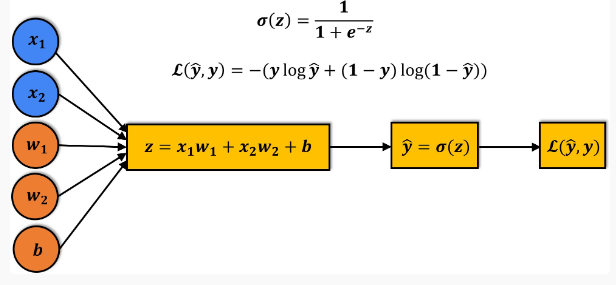

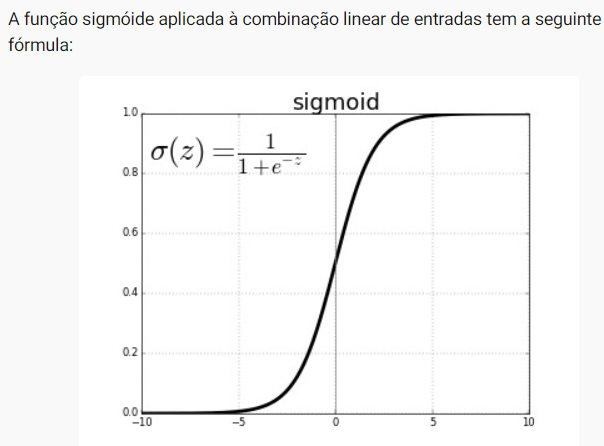

A saída da função sigmóide é chamada de logística, daí o nome regressão logística .

A regressão logística também pode ser aplicada a problemas de classificação multiclasse, com algumas modificações.

#Fluxo de trabalho de aprendizado de máquina

Quer estejamos resolvendo um problema de regressão usando regressão linear ou um problema de classificação usando regressão logística, o fluxo de trabalho para treinar um modelo é exatamente o mesmo:

- 1. Inicializamos um modelo com parâmetros aleatórios (pesos e tendências).
- 2. Passamos algumas entradas para o modelo para obter previsões.
- 3. Comparamos as previsões do modelo com as metas reais usando a função de perda.
- 4. Usamos uma técnica de otimização (como mínimos quadrados, descida de gradiente etc.) para reduzir a perda ajustando os pesos e tendências do modelo
- 5. Repetimos as etapas 1 a 4 até que as previsões do modelo sejam boas o suficiente.

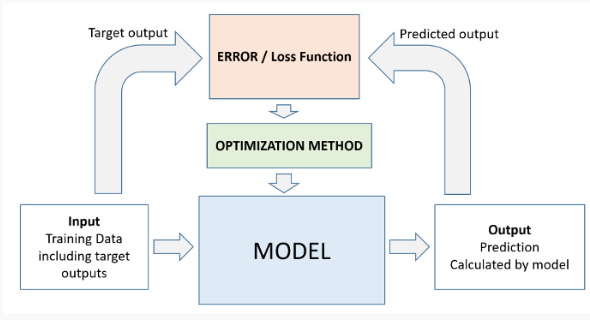

`Classificação e regressão são problemas de aprendizado de máquina supervisionado porque usam dados rotulados`.

O aprendizado de máquina aplicado a dados não rotulados é conhecido como aprendizado não supervisionado.

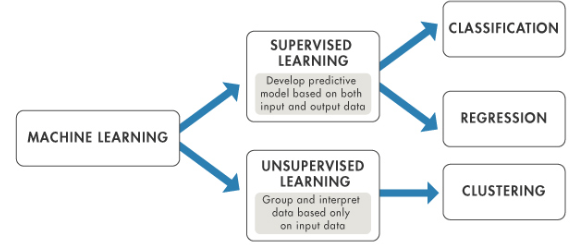

Neste tutorial, treinaremos um modelo de regressão logística usando o conjunto de dados Rain in Australia para `prever se choverá ou não em um local amanhã`, usando os dados de hoje.

`Este é um problema de classificação binária `.

Vamos instalar a `scikit-learn ` biblioteca que usaremos para treinar nosso modelo.

In [ ]:
!pip install scikit-learn --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 58.0 MB/s eta 0:00:00


#Baixando os dados

Usaremos a opendatasets para baixar os dados do Kaggle diretamente no Jupyter.

Vamos instalar e importar opendatasets.

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.version()

'0.1.22'

O conjunto de dados agora pode ser baixado usando od.download. Ao executar od.download, você será solicitado a fornecer seu nome de usuário Kaggle e chave de API. Siga estas instruções para criar uma chave API: http://bit.ly/kaggle-creds

Salve o arquivo json junto ao jupyter notebookpara que o nome de usuario e senha sejam baixados,automaticamente.  senao, tera que inseridos manualmente.

In [ ]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [ ]:
od.download(dataset_url)

100%|██████████| 3.83M/3.83M [00:00<00:00, 236MB/s]

Assim que o comando acima for executado, o conjunto de dados é baixado e extraído para o diretório weather-dataset-rattle-package.

In [ ]:
import os

In [ ]:
data_dir = './weather-dataset-rattle-package'

In [ ]:
os.listdir(data_dir)

['weatherAUS.csv']

In [ ]:
train_csv = data_dir + '/weatherAUS.csv'

Vamos carregar os dados weatherAUS.csvusando o Pandas.

In [ ]:
!pip install pandas --quiet

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_csv)

In [ ]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

O conjunto de dados contém mais de 145.000 linhas e 23 colunas.

O conjunto de dados contém colunas de data, numéricas e categóricas.

Nosso objetivo é criar um modelo para prever o valor da coluna RainTomorrow.

Vamos verificar os tipos de dados e os valores ausentes nas várias colunas.

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Embora devamos ser capazes de preencher valores faltantes para a maioria das colunas, pode ser uma boa ideia `descartar as linhas onde o valor de RainTomorrow ou RainToday está faltando` para tornar nossa análise e modelagem mais simples (já que uma delas é a variável alvo, e a outro provavelmente estará intimamente relacionado com a variável alvo).

In [ ]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

#Análise Exploratória e Visualização de Dados

Antes de treinar um modelo de aprendizado de máquina, é sempre uma boa ideia explorar as distribuições de várias colunas e ver como elas estão relacionadas à coluna de destino.

Vamos explorar e visualizar os dados usando as bibliotecas Plotly, Matplotlib e Seaborn.

In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
px.histogram(raw_df, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [ ]:
px.histogram(raw_df,
             x='Temp3pm',
             title='Temperature at 3 pm vs. Rain Tomorrow',
             color='RainTomorrow')

In [ ]:
px.histogram(raw_df,
             x='RainTomorrow',
             color='RainToday',
             title='Rain Tomorrow vs. Rain Today')

In [ ]:
px.scatter(raw_df.sample(2000),
           title='Min Temp. vs Max Temp.',
           x='MinTemp',
           y='MaxTemp',
           color='RainToday')

In [ ]:
px.scatter(raw_df.sample(2000),
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

EXERCÍCIO : Visualize todas as outras colunas do conjunto de dados e estude sua relação com as colunas RainTodaye RainTomorrow.

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

In [ ]:
px.scatter(raw_df.sample(2000),
           title='rainfall e maxtemp',
           x='MaxTemp',
           y='Rainfall',
           color='RainTomorrow')

In [ ]:
px.scatter(raw_df.sample(2000),
           title='minTemp e rainfall',
           x='MinTemp',
           y='Rainfall',
           color='RainTomorrow')

In [ ]:
px.scatter(raw_df.sample(2000),
           title='pressure e humidity as 3pm',
           x='WindSpeed3pm',
           y='Pressure3pm',
           color='RainTomorrow')

In [ ]:
px.scatter(raw_df.sample(2000),
           title='nuvem e pressão as 3pm',
           x='Cloud3pm',
           y='Pressure3pm',
           color='RainTomorrow')

#(Opcional) Trabalhando com uma amostra


Ao trabalhar com conjuntos de dados enormes contendo milhões de linhas, é uma boa ideia trabalhar inicialmente com uma amostra, para configurar rapidamente o seu caderno de treinamento de modelo. Se você quiser trabalhar com uma amostra, basta definir o valor use_samplecomo True

In [ ]:
#use_sample = False

In [ ]:
#sample_fraction = 0.1

In [ ]:
#if use_sample:
#    raw_df = raw_df.sample(frac=sample_fraction).copy()

Certifique-se de configurar use_samplee Falseexecutar novamente o notebook de ponta a ponta quando estiver pronto para usar todo o conjunto de dados.


#Conjuntos de treinamento, validação e teste

Ao construir modelos de aprendizado de máquina do mundo real, é bastante comum dividir o conjunto de dados em três partes:

- Conjunto de treinamento - utilizado para treinar o modelo, ou seja, calcular a perda e ajustar os pesos do modelo utilizando uma técnica de otimização.

- Conjunto de validação - usado para avaliar o modelo durante o treinamento, ajustar os hiperparâmetros do modelo (técnica de otimização, regularização etc.) e escolher a melhor versão do modelo. Escolher um bom conjunto de validação é essencial para modelos de treinamento que generalizem bem.

- Conjunto de testes – usado para comparar diferentes modelos ou abordagens e relatar a precisão final do modelo. Para muitos conjuntos de dados, os conjuntos de teste são fornecidos separadamente. O conjunto de testes deve refletir o tipo de dados que o modelo encontrará no mundo real, da forma mais próxima possível.



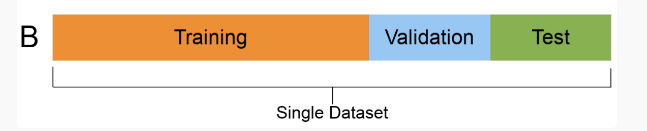

Como regra geral você pode usar `cerca de 60% dos dados para o conjunto de treinamento, 20% para o conjunto de validação e 20% para o conjunto de teste`. Se um conjunto de testes separado já for fornecido, você poderá usar uma `divisão de treinamento-validação de 75% a 25%`.

`Quando as linhas do conjunto de dados não têm ordem inerente`, é prática comum escolher subconjuntos aleatórios de linhas para criar conjuntos de teste e validação. Isso pode ser feito usando o train_test_split utilitário do scikit-learn

In [ ]:
!pip install scikit-learn --upgrade --quiet

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)

train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


No entanto, ao trabalhar com datas, muitas vezes é melhor separar os conjuntos de treinamento, validação e teste com o tempo, para que o modelo seja treinado em dados do passado e avaliado em dados do futuro.

Para o conjunto de dados atual, podemos usar a coluna Data no conjunto de dados para criar outra coluna para o ano. Escolheremos os últimos dois anos para o conjunto de teste e um ano antes para o conjunto de validação.

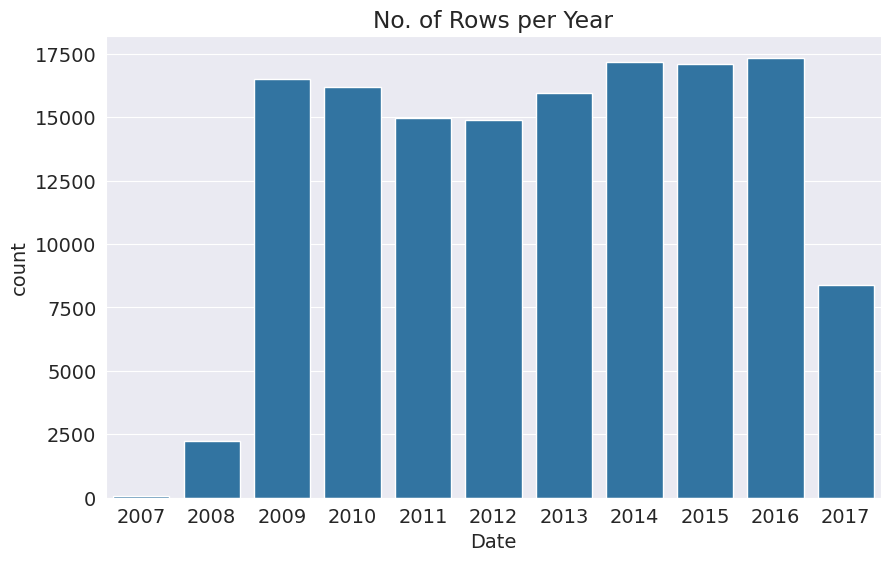

In [ ]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [ ]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


Embora não seja uma divisão 60-20-20 perfeita, garantimos que a validação do teste e os conjuntos de testes contenham dados para todos os 12 meses do ano.

In [ ]:
train_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144548  2014-12-27    Uluru     16.9     33.2       0.0          NaN   
144549  2014-12-28    Uluru     15.1     36.8       0.0          NaN   
144550  2014-12-29    Uluru     17.3     37.8       0.0          NaN   
144551  2014-12-30    Uluru     20.1     38.5       0.0          NaN   
144552  2014-12-31    Uluru     22.5     39.6       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
144548       NaN         SSE           43.0        ESE  ...        22.0   
144549       NaN          NE           31.0        ENE  ...        16.0   
144550       NaN         ESE           39.0        ESE  ...        15.0   
144551       NaN         ESE           43.0        ESE  ...        22.0   
144552       NaN         WNW           76.0        ENE  ...        16.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
144548         13.0       1014.1       1009.8       NaN       NaN     23.7   
144549          8.0       1012.6       1007.6       NaN       NaN     28.9   
144550          8.0       1011.9       1008.0       NaN       NaN     29.7   
144551          9.0       1014.0       1009.2       NaN       NaN     29.8   
144552          9.0       1012.1       1006.2       NaN       NaN     30.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
144548     31.8         No            No  
144549     34.8         No            No  
144550     35.7         No            No  
144551     37.2         No            No  
144552     37.4         No            No  

[97988 rows x 23 columns]

In [ ]:
val_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2133    2015-01-01   Albury     11.4     33.5       0.0          NaN   
2134    2015-01-02   Albury     15.5     39.6       0.0          NaN   
2135    2015-01-03   Albury     17.1     38.3       0.0          NaN   
2136    2015-01-04   Albury     26.0     33.1       0.0          NaN   
2137    2015-01-05   Albury     19.0     35.2       0.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144913  2015-12-27    Uluru     20.5     34.7       0.0          NaN   
144914  2015-12-28    Uluru     18.0     36.4       0.0          NaN   
144915  2015-12-29    Uluru     17.5     37.1       0.0          NaN   
144916  2015-12-30    Uluru     20.0     38.9       0.0          NaN   
144917  2015-12-31    Uluru     19.3     37.4       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2133         NaN         WSW           30.0        ESE  ...        45.0   
2134         NaN          NE           56.0        ESE  ...        45.0   
2135         NaN         NNE           48.0         NE  ...        35.0   
2136         NaN         NNE           41.0        ESE  ...        46.0   
2137         NaN           E           33.0        SSE  ...        60.0   
...          ...         ...            ...        ...  ...         ...   
144913       NaN           E           52.0        ESE  ...        23.0   
144914       NaN         ESE           54.0          E  ...        17.0   
144915       NaN           E           56.0          E  ...        12.0   
144916       NaN           E           59.0          E  ...        12.0   
144917       NaN          SE           56.0        ESE  ...        46.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2133           14.0       1013.5       1011.0       NaN       NaN     21.0   
2134           12.0       1016.0       1012.4       NaN       NaN     25.6   
2135           19.0       1017.9       1012.3       NaN       NaN     29.2   
2136           37.0       1013.6       1012.1       8.0       5.0     27.4   
2137           34.0       1017.4       1014.7       8.0       NaN     25.6   
...             ...          ...          ...       ...       ...      ...   
144913         12.0       1013.2       1010.1       NaN       NaN     24.3   
144914          7.0       1014.7       1010.9       NaN       NaN     26.7   
144915          7.0       1012.6       1007.5       NaN       NaN     28.1   
144916         12.0       1007.2       1002.6       NaN       1.0     31.3   
144917         18.0       1007.3       1003.7       NaN       NaN     25.8   

        Temp3pm  RainToday  RainTomorrow  
2133       32.7         No            No  
2134       38.2         No            No  
2135       37.0         No            No  
2136       30.9         No            No  
2137       32.5         No            No  
...         ...        ...           ...  
144913     33.0         No            No  
144914     35.0         No            No  
144915     34.7         No            No  
144916     38.4         No            No  
144917     35.8         No            No  

[17089 rows x 23 columns]

In [ ]:
test_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2498    2016-01-01   Albury     20.4     37.6       0.0          NaN   
2499    2016-01-02   Albury     20.9     33.6       0.4          NaN   
2500    2016-01-03   Albury     18.4     23.1       2.2          NaN   
2501    2016-01-04   Albury     17.3     23.7      15.6          NaN   
2502    2016-01-05   Albury     15.5     22.9       6.8          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2498         NaN         ENE           54.0        NaN  ...        46.0   
2499         NaN         SSE           50.0        SSE  ...        54.0   
2500         NaN         ENE           48.0        ESE  ...        62.0   
2501         NaN         SSE           39.0         SE  ...        74.0   
2502         NaN         ENE           31.0         SE  ...        92.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2498           17.0       1013.4       1009.2       7.0       3.0     26.1   
2499           30.0       1011.1       1008.4       8.0       8.0     24.8   
2500           67.0       1014.0       1014.8       8.0       8.0     21.8   
2501           65.0       1017.9       1016.5       8.0       8.0     19.2   
2502           63.0       1016.3       1013.9       8.0       8.0     17.2   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
2498       36.7         No            No  
2499       31.7         No           Yes  
2500       19.5        Yes           Yes  
2501       21.6        Yes           Yes  
2502       22.2        Yes            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[25710 rows x 23 columns]

Identificando Colunas de Entrada e Destino
Muitas vezes, nem todas as colunas de um conjunto de dados são úteis para treinar um modelo. No conjunto de dados atual, podemos ignorar a Datecoluna, pois queremos apenas as condições climáticas para fazer uma previsão se choverá no dia seguinte.

Vamos criar uma lista de colunas de entrada e também identificar a coluna de destino.

In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [ ]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [ ]:
target_col

'RainTomorrow'

Agora podemos criar entradas e alvos para os conjuntos de treinamento, validação e teste para processamento adicional e treinamento de modelo.

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1       8.0   
1              44.0         25.0       1010.6       1007.8       NaN   
2              38.0         30.0       1007.6       1008.7       NaN   
3              45.0         16.0       1017.6       1012.8       NaN   
4              82.0         33.0       1010.8       1006.0       7.0   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8       NaN   
144549         16.0          8.0       1012.6       1007.6       NaN   
144550         15.0          8.0       1011.9       1008.0       NaN   
144551         22.0          9.0       1014.0       1009.2       NaN   
144552         16.0          9.0       1012.1       1006.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0            NaN     16.9     21.8         No  
1            NaN     17.2     24.3         No  
2            2.0     21.0     23.2         No  
3            NaN     18.1     26.5         No  
4            8.0     17.8     29.7         No  
...          ...      ...      ...        ...  
144548       NaN     23.7     31.8         No  
144549       NaN     28.9     34.8         No  
144550       NaN     29.7     35.7         No  
144551       NaN     29.8     37.2         No  
144552       NaN     30.1     37.4         No  

[97988 rows x 21 columns]

In [ ]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

Vamos também identificar quais das colunas são numéricas e quais são categóricas. Isso será útil mais tarde, pois precisaremos converter os dados categóricos em números para treinar um modelo de regressão logística.

In [ ]:
!pip install numpy --quiet

In [ ]:
import numpy as np

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

Vamos ver algumas estatísticas para as colunas numéricas

In [ ]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

Os intervalos das colunas numéricas parecem razoáveis? Caso contrário, talvez tenhamos que fazer alguma limpeza de dados também.

Vamos também verificar o número de categorias em cada uma das colunas categóricas.

In [ ]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

#Imputando dados numéricos ausentes

Os modelos de aprendizado de máquina não funcionam com dados numéricos ausentes. `O processo de preenchimento de valores faltantes é chamado de imputação`.

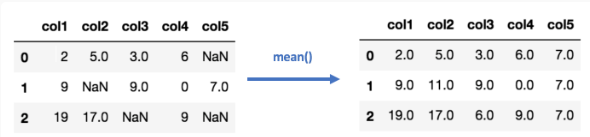

Existem diversas técnicas de imputação, mas usaremos a mais básica: substituir os valores faltantes pelo valor médio na coluna usando a SimpleImputerclasse from sklearn.impute.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'mean')

Antes de realizarmos a imputação, vamos verificar o no. de valores ausentes em cada coluna numérica.

In [ ]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

Esses valores estão espalhados pelos conjuntos de treinamento, teste e validação. Você também pode verificar o no. de valores ausentes individualmente `train_inputs para val_inputs e test_inputs.`

In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

O primeiro passo na imputação é fit imputar os dados, ou seja, calcular a estatística escolhida (por exemplo, média) para cada coluna do conjunto de dados.

In [ ]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

Depois de chamar fit, a estatística calculada para cada coluna é armazenada na statistics_propriedade de imputer.

In [ ]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

Os valores ausentes nos conjuntos de treinamento, teste e validação agora podem ser preenchidos usando o transformmétodo de imputer.

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

Os valores faltantes agora são preenchidos com a média de cada coluna.

EXERCÍCIO : Aplique algumas outras técnicas de imputação e observe como elas alteram os resultados do modelo. Você pode aprender mais sobre outras técnicas de imputação aqui: https://scikit-learn.org/stable/modules/impute.html

In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

Dimensionando recursos numéricos
Outra boa prática é dimensionar recursos numéricos para um pequeno intervalo de valores, por exemplo
(
0
,
1
)
( 0 ,1 )ou
(
-
1
,
1
)
( -1 , _1 ). O dimensionamento de recursos numéricos garante que nenhum recurso específico tenha um impacto desproporcional na perda do modelo. Os algoritmos de otimização também funcionam melhor na prática com números menores.

As colunas numéricas em nosso conjunto de dados possuem intervalos variados.



In [ ]:
raw_df[numeric_cols].describe()

MinTemp       MaxTemp       Rainfall   Evaporation      Sunshine  \
count  140319.000000  140480.00000  140787.000000  81093.000000  73982.000000   
mean       12.184824      23.23512       2.349974      5.472516      7.630540   
std         6.403879       7.11450       8.465173      4.189132      3.781729   
min        -8.500000      -4.80000       0.000000      0.000000      0.000000   
25%         7.600000      17.90000       0.000000      2.600000      4.900000   
50%        12.000000      22.60000       0.000000      4.800000      8.500000   
75%        16.800000      28.30000       0.800000      7.400000     10.700000   
max        33.900000      48.10000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  131682.000000  139732.000000  138256.000000  139270.000000   
mean       39.970520      13.990496      18.631141      68.826833   
std        13.578201       8.886210       8.798096      19.063650   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.000000       7.000000      13.000000      57.000000   
50%        39.000000      13.000000      19.000000      70.000000   
75%        48.000000      19.000000      24.000000      83.000000   
max       135.000000     130.000000      87.000000     100.000000   

         Humidity3pm    Pressure9am    Pressure3pm      Cloud9am  \
count  137286.000000  127044.000000  127018.000000  88162.000000   
mean       51.449288    1017.654577    1015.257963      4.431161   
std        20.807310       7.104867       7.035411      2.886594   
min         0.000000     980.500000     977.100000      0.000000   
25%        37.000000    1013.000000    1010.400000      1.000000   
50%        52.000000    1017.600000    1015.200000      5.000000   
75%        66.000000    1022.400000    1020.000000      7.000000   
max       100.000000    1041.000000    1039.600000      9.000000   

           Cloud3pm        Temp9am        Temp3pm  
count  84693.000000  140131.000000  138163.000000  
mean       4.499250      16.987066      21.693183  
std        2.719752       6.496012       6.937784  
min        0.000000      -7.200000      -5.400000  
25%        2.000000      12.300000      16.600000  
50%        5.000000      16.700000      21.100000  
75%        7.000000      21.600000      26.400000  
max        9.000000      40.200000      46.700000

Vamos usar MinMaxScalerfrom sklearn.preprocessingpara escalar valores para o
(
0
,
1
)
( 0 ,1 )faixa.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
?MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

Primeiro, fazemos fit o escalonador dos dados, ou seja, calculamos o intervalo de valores para cada coluna numérica.

In [ ]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

Agora podemos inspecionar os valores mínimo e máximo em cada coluna.



In [69]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [70]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2,
 46.7]

#Agora podemos dimensionar separadamente os conjuntos de treinamento, validação e teste usando o transformmétodo scaler.

In [71]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

Podemos agora verificar se os valores em cada coluna estão no intervalo
(
0
,
1
)




In [72]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517103  
std        0.130726  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

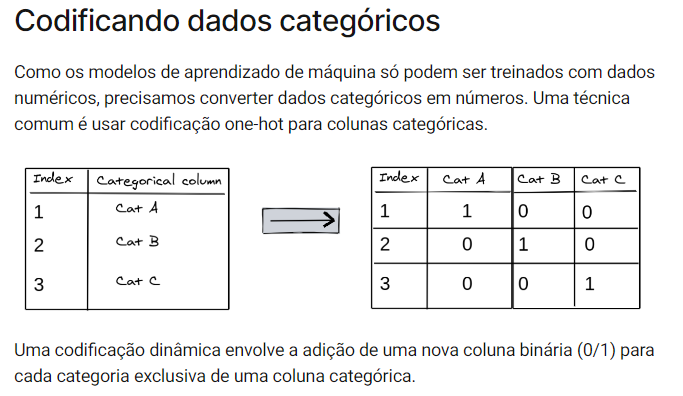

In [73]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

Podemos realizar uma codificação a quente usando a OneHotEncoderclasse from sklearn.preprocessing.

In [74]:
from sklearn.preprocessing import OneHotEncoder

In [75]:
encoder = OneHotEncoder(drop='first')

In [76]:
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(drop='first')

Primeiro, usamos fit o codificador dos dados, ou seja, identificamos a lista completa de categorias em todas as colunas categóricas.

In [77]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [78]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols]).toarray()
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols]).toarray()
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols]).toarray()

In [79]:
train_inputs.sample(10)

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
86132        Brisbane  0.464623  0.531191  0.000539     0.020690  0.655172   
59268         Bendigo  0.495283  0.493384  0.015094     0.037741  0.526244   
39731     Williamtown  0.417453  0.402647  0.000000     0.006897  0.096552   
9093     CoffsHarbour  0.674528  0.640832  0.001617     0.038621  0.751724   
19616       NorahHead  0.530660  0.487713  0.000000     0.037741  0.526244   
105602        Woomera  0.537736  0.574669  0.000000     0.129655  0.875862   
82778        Dartmoor  0.662736  0.640832  0.000000     0.020690  0.000000   
4738    BadgerysCreek  0.601415  0.561437  0.114286     0.037741  0.526244   
30467          Sydney  0.582547  0.533081  0.000000     0.027586  0.572414   
112893    Witchcliffe  0.327830  0.425331  0.000539     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_S  \
86132            E       0.100775        SSW         NE  ...           0.0   
59268            S       0.395349          S         SE  ...           0.0   
39731          WNW       0.286822         NW         NW  ...           0.0   
9093            NE       0.209302         SE        ENE  ...           0.0   
19616            W       0.139535          W          S  ...           1.0   
105602           S       0.441860        SSE        SSE  ...           0.0   
82778          ESE       0.155039        NaN          S  ...           1.0   
4738            NE       0.186047        NaN        ENE  ...           0.0   
30467          NaN       0.263337        NNE         NE  ...           0.0   
112893         NNW       0.255814          N        NNW  ...           0.0   

        WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  \
86132             0.0             0.0             0.0            0.0   
59268             1.0             0.0             0.0            0.0   
39731             0.0             0.0             0.0            0.0   
9093              0.0             0.0             0.0            0.0   
19616             0.0             0.0             0.0            0.0   
105602            0.0             1.0             0.0            0.0   
82778             0.0             0.0             0.0            0.0   
4738              0.0             0.0             0.0            0.0   
30467             0.0             0.0             0.0            0.0   
112893            0.0             0.0             0.0            0.0   

        WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  \
86132            0.0             0.0             0.0             0.0   
59268            0.0             0.0             0.0             0.0   
39731            0.0             0.0             0.0             0.0   
9093             0.0             0.0             0.0             0.0   
19616            0.0             0.0             0.0             0.0   
105602           0.0             0.0             0.0             0.0   
82778            0.0             0.0             0.0             0.0   
4738             0.0             0.0             0.0             0.0   
30467            0.0             0.0             0.0             0.0   
112893           0.0             0.0             0.0             0.0   

        RainToday_Yes  
86132             0.0  
59268             1.0  
39731             0.0  
9093              0.0  
19616             0.0  
105602            0.0  
82778             0.0  
4738              1.0  
30467             0.0  
112893            0.0  

[10 rows x 118 columns]

In [80]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [81]:
X_test

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
2498    0.681604  0.801512  0.000000     0.037741  0.526244       0.372093   
2499    0.693396  0.725898  0.001078     0.037741  0.526244       0.341085   
2500    0.634434  0.527410  0.005930     0.037741  0.526244       0.325581   
2501    0.608491  0.538752  0.042049     0.037741  0.526244       0.255814   
2502    0.566038  0.523629  0.018329     0.037741  0.526244       0.193798   
...          ...       ...       ...          ...       ...            ...   
145454  0.283019  0.502836  0.000000     0.037741  0.526244       0.193798   
145455  0.266509  0.533081  0.000000     0.037741  0.526244       0.193798   
145456  0.285377  0.568998  0.000000     0.037741  0.526244       0.124031   
145457  0.327830  0.599244  0.000000     0.037741  0.526244       0.240310   
145458  0.384434  0.601134  0.000000     0.037741  0.526244       0.170543   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
2498        0.000000      0.080460         0.46         0.17  ...   
2499        0.069231      0.195402         0.54         0.30  ...   
2500        0.084615      0.448276         0.62         0.67  ...   
2501        0.069231      0.195402         0.74         0.65  ...   
2502        0.046154      0.103448         0.92         0.63  ...   
...              ...           ...          ...          ...  ...   
145454      0.115385      0.149425         0.59         0.27  ...   
145455      0.100000      0.126437         0.51         0.24  ...   
145456      0.100000      0.103448         0.56         0.21  ...   
145457      0.069231      0.103448         0.53         0.24  ...   
145458      0.100000      0.080460         0.51         0.24  ...   

        WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
2498             0.0            0.0             0.0             0.0   
2499             0.0            1.0             0.0             0.0   
2500             0.0            0.0             0.0             0.0   
2501             0.0            0.0             1.0             0.0   
2502             0.0            0.0             1.0             0.0   
...              ...            ...             ...             ...   
145454           0.0            0.0             0.0             0.0   
145455           0.0            0.0             0.0             0.0   
145456           0.0            0.0             0.0             0.0   
145457           0.0            0.0             0.0             0.0   
145458           0.0            0.0             0.0             0.0   

        WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  \
2498              0.0           0.0             0.0             0.0   
2499              0.0           0.0             0.0             0.0   
2500              0.0           0.0             0.0             0.0   
2501              0.0           0.0             0.0             0.0   
2502              0.0           0.0             0.0             0.0   
...               ...           ...             ...             ...   
145454            0.0           0.0             0.0             0.0   
145455            0.0           0.0             0.0             0.0   
145456            0.0           0.0             0.0             0.0   
145457            0.0           0.0             1.0             0.0   
145458            0.0           0.0             0.0             0.0   

        WindDir3pm_nan  RainToday_Yes  
2498               0.0            0.0  
2499               0.0            0.0  
2500               0.0            1.0  
2501               0.0            1.0  
2502               0.0            1.0  
...                ...            ...  
145454             0.0            0.0  
145455             0.0            0.0  
145456             0.0            0.0  
145457             0.0            0.0  
145458             0.0            0.0  

[25710 rows x 113 columns]

#VAMOS DISCUTIR ALGUNS PONTOS DE PARADA QUE PASSAMOS ATÉ AQUI

A diferença fundamental entre `RandomForestClassifier`e `RandomForestRegressor`está no tipo de problema que cada um deles resolve.

- RandomForestClassifier:

Usado para problemas de classificação, onde o objetivo é prever a classe de um conjunto de amostras. Por exemplo, prever se um email é spam ou nao spam, ou se uma transação é fraudulenta ou nao.

- RandomForestRegressor

Usado para problemas de regressão, onde o objetivo é prever um valor numerico. Por exemplo, prever o preço de uma casa com base em várias características, ou prever a quantidade de vendas de um produto.

Ambos são variações do algoritmo Random Forest, que é um método de conjunto baseado em arvores de decisão. O Random Forest cria várias árvores de decisão durante o treinamento e faz previsões combinadas, seja através de votação no caso de classificação ou média no caso de regressão.

Em resumo:
- `RandomForestClassifier`para problemas de classificação.

- `RandomForestRegressor`para problemas de regressão.


#LabelEncoder, OrdinalEncoder ou OneHotEncoder? Qual usar?

A escolha entra LabelEncoder, OrdinalEncoder ou OneHotEncoder depende do tipo de dados categoricos e das caracteristicas especificas do seu conjunto de dados. Vamos discutir brevemente cada um deles:

- LabelEncoder:

É adequado quando voce tem uma variavel categorica ordinal, ou seja, uma variavel categorica que possui uma ordem natural. Ele atribui rotulos inteiros a cada categoria, mantendo a ordem. Exemplo: Variavel 'tamanho' com categorias 'Pequeno', 'Medio' e 'grande'.
```python
from skearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['tamanho'] = label_encoder.fit_transform(data['tamanho'])
```


- OrdinalEncoder:

É semelhandte ao `LabelEncoder` mas pode lidar com varias colunas categóricas simultaneamente. Ele atribui rótulos inteiros com base na ordem das categorias em cada coluna. É util quando vc tem varias varias categoricas ordinal

- OneHotEncoder:

O `OneHotEncoder`é apropriado quando voce tem variaveis categoricas nominais, ou seja, categorias sem uma ordem especifica. Ele cria colunas binarias (0 e 1) para cada categoria, transformando a variavel categorica em uma representação de one-hot.

exemplo: variavel 'cor' com categorias 'vermelho', 'verde' e 'azul'.

```python
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False,drop='first') #drop='first' para evitar a multicolinearidade
data_encoded = pd.DataFrame(encoder.fit_transform(data[['cor']]), columns=encoder.get_features_names(['cor']))
data = pd.concat([data,data_encoded],axis=1).drop(['cor'],axis=1)

```

onehotencoder é usado quando a variavel categorica for nominal (nao tem uma ordem especifica) e vc quiser evitar a atribuição de uma ordem artificial às categorias .

já labelencoder e ordinalencoder é usado quando a variavel categorica for ordinal(tem uma ordem natural).

#use drop=first para evitar a multicolinearidade, especialmente em modelos que podem serr sensiveis à multicolinearidade, como regressao linear.


#Treinamento e visualização de árvores de decisão
Uma árvore de decisão em linguagem geral representa uma série hierárquica de decisões binárias:

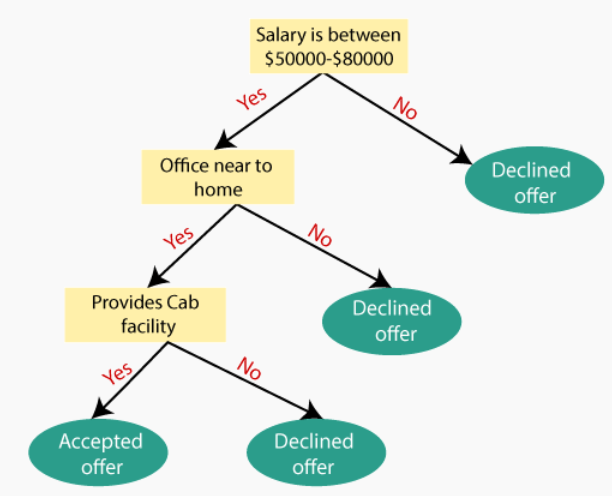

Uma árvore de decisão no aprendizado de máquina funciona exatamente da mesma maneira, exceto que deixamos o computador descobrir a estrutura e a hierarquia ideais das decisões, em vez de definir os critérios manualmente.

#`TREINAMENTO`

Podemos usar DecisionTreeClassifierfrom sklearn.treepara treinar uma árvore de decisão.


In [82]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

Uma árvore de decisão ideal foi criada usando os dados de treinamento.

#`AVALIAÇÃO`

Vamos avaliar a árvore de decisão usando a pontuação de precisão.



In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [84]:
train_preds = model.predict(X_train)

In [85]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [86]:
pd.value_counts(train_preds)

No     76192
Yes    21796
dtype: int64

A árvore de decisão também retorna probabilidades para cada previsão.

In [87]:
train_probs = model.predict_proba(X_train)

In [88]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Parece que a árvore de decisão está bastante confiante em suas previsões.

Vamos verificar a precisão de suas previsões

In [89]:
accuracy_score(train_targets, train_preds)

0.9999795893374699

A precisão do conjunto de treinamento está próxima de 100%!

Mas não podemos confiar apenas na precisão do conjunto de treinamento; devemos avaliar o modelo também no conjunto de validação.

Podemos fazer previsões e calcular a precisão em uma única etapa usando model.score

In [90]:
model.score(X_val, val_targets)

0.7939025103867985

Embora a precisão do treinamento seja de 100%, a precisão do conjunto de validação é de apenas 79%, o que é apenas marginalmente melhor do que sempre prever "Não".

In [91]:
val_targets.value_counts() / len(val_targets)

No     0.790626
Yes    0.209374
Name: RainTomorrow, dtype: float64

Parece que o modelo aprendeu perfeitamente os exemplos de treinamento e não generaliza bem para exemplos nunca antes vistos. Esse fenômeno é chamado de "overfitting" e reduzir o overfitting é uma das partes mais importantes de qualquer projeto de aprendizado de máquina.

#Visualização
Podemos visualizar a árvore de decisão aprendida com os dados de treinamento.

In [92]:
from sklearn.tree import plot_tree, export_text

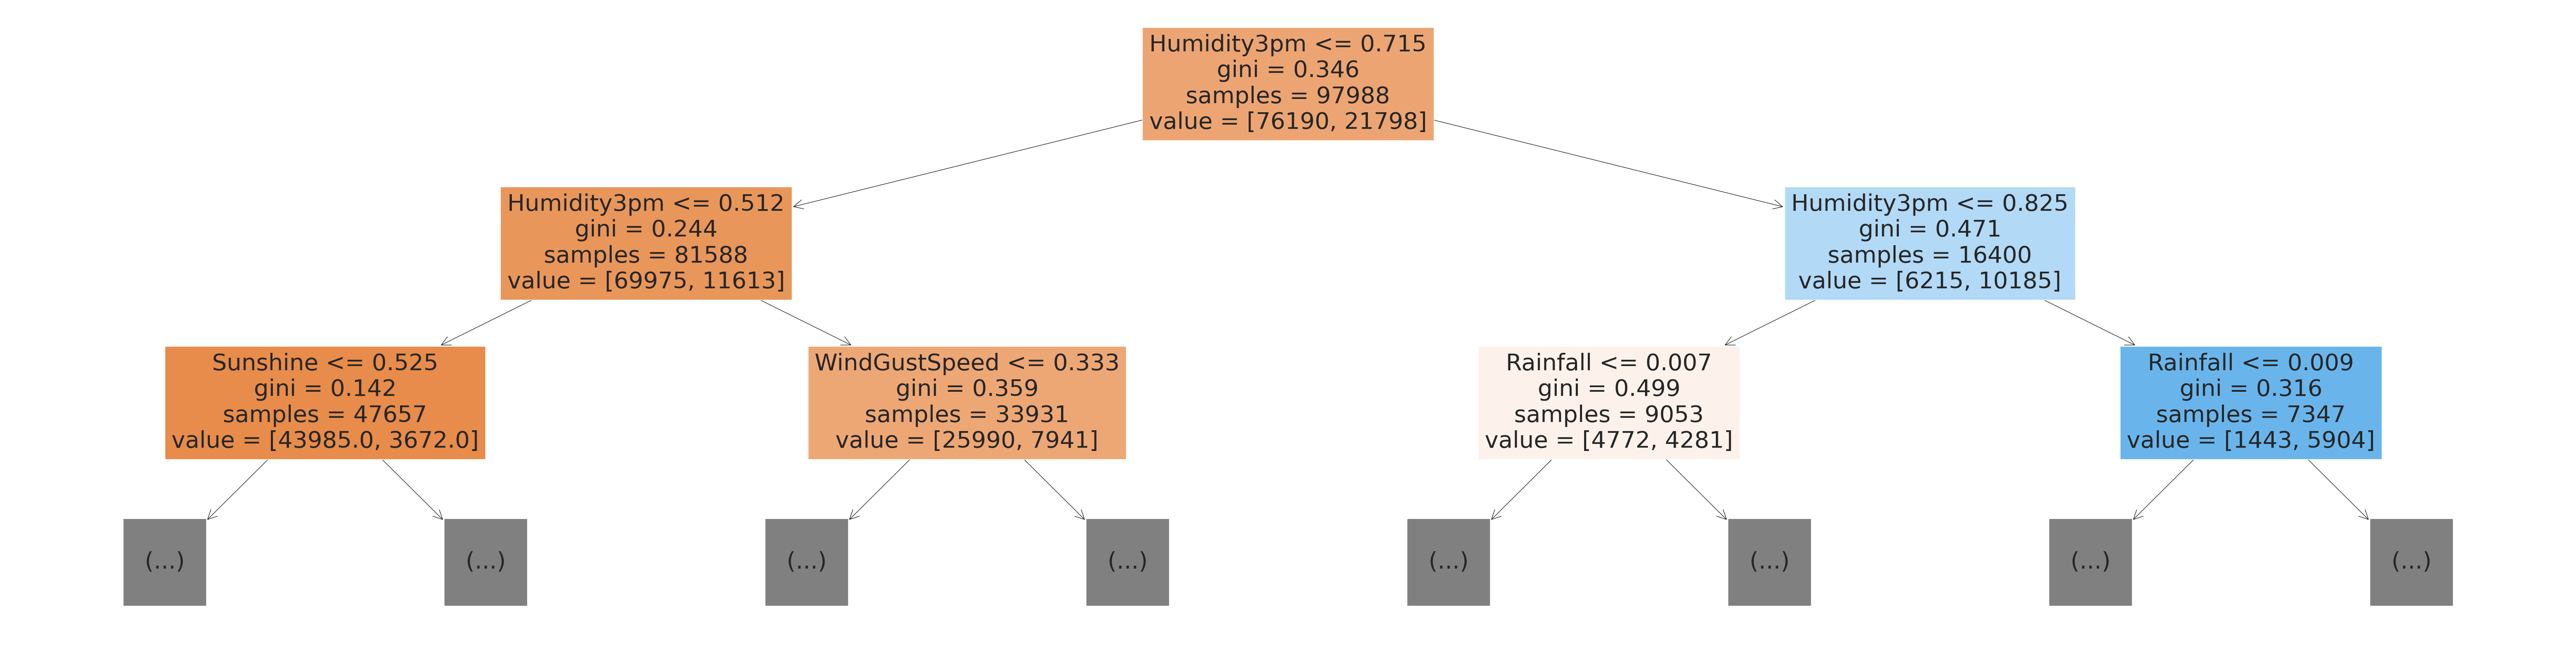

In [93]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

Você consegue ver como o modelo classifica uma determinada entrada como uma série de decisões? A árvore é truncada aqui, mas seguir qualquer caminho do nó raiz até uma folha resultará em “Sim” ou “Não”. Você vê como uma árvore de decisão difere de um modelo de regressão logística?

#Como uma árvore de decisão é criada

Observe o gini valor em cada caixa. Esta é a `função de perda usada pela árvore de decisão` para decidir qual coluna deve ser usada para dividir os dados e em que ponto a coluna deve ser dividida. Um índice de Gini mais baixo indica uma melhor divisão. `Uma divisão perfeita (apenas uma classe de cada lado) tem índice de Gini igual a 0.`

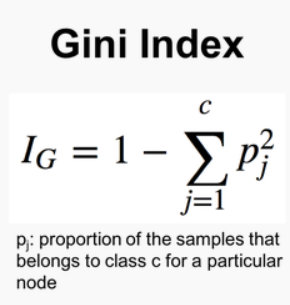

Conceitualmente falando, durante o treinamento, os modelos avaliam todas as divisões possíveis em todas as colunas possíveis e escolhem a melhor. Em seguida, ele executa recursivamente uma divisão ideal para as duas porções. Na prática, porém, é muito ineficiente verificar todas as divisões possíveis, por isso o modelo utiliza uma heurística (estratégia predefinida) combinada com alguma randomização.

A abordagem iterativa do fluxo de trabalho de aprendizado de máquina no caso de uma árvore de decisão envolve o crescimento da árvore camada por camada:

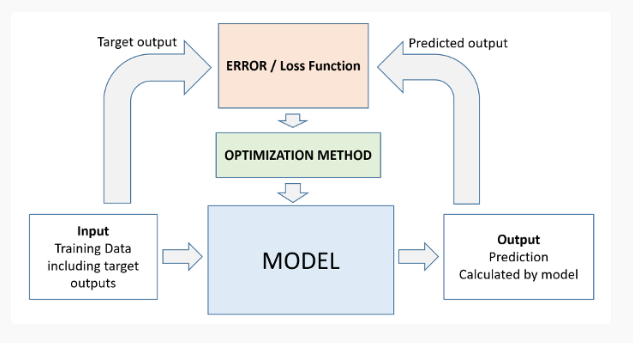

Vamos verificar a profundidade da árvore que foi criada.

In [94]:
model.tree_.max_depth

48

Também podemos exibir a árvore como texto, o que pode ser mais fácil de acompanhar em árvores mais profundas.

In [95]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- WindGustDir_N <= 0.50
|   |   |   |   |   |   |   |--- WindSpeed9am <= 0.32
|   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.06
|   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.06
|   |   |   |   |   |   |   |   |   |   |--- Temp9am <= 0.65
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- Temp9am >  0.65
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- Pressure3pm >  0.44
|   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- WindSpeed9am >  0.32
|   |   |   |   |   |   |   | 

EXERCÍCIO : Com base na discussão acima, você pode explicar por que a precisão do treinamento é de 100%, enquanto a precisão da validação é menor?

Com base nos cálculos do índice de Gini, uma árvore de decisão atribui um valor de “importância” a cada recurso. Esses valores podem ser usados ​​para interpretar os resultados fornecidos por uma árvore de decisão.

In [96]:
model.feature_importances_

array([3.67780815e-02, 3.12820050e-02, 4.50297813e-02, 2.46285172e-02,
       4.69205428e-02, 6.00484076e-02, 2.64607527e-02, 2.92837029e-02,
       3.96031839e-02, 2.79423580e-01, 3.75189272e-02, 6.21449134e-02,
       1.42731290e-02, 1.69335563e-02, 3.65575632e-02, 3.39915835e-02,
       2.03737889e-03, 1.05000090e-03, 7.76182133e-04, 1.33612263e-03,
       1.03187454e-03, 9.08910132e-04, 1.76575096e-03, 8.39226017e-04,
       1.52721994e-03, 9.12239561e-04, 2.12061566e-03, 1.57980572e-03,
       4.84888047e-04, 7.76498750e-04, 1.34699302e-03, 6.16690435e-05,
       1.24478265e-03, 9.60357896e-04, 1.38332395e-03, 1.12916835e-03,
       1.05565136e-03, 1.38877307e-03, 1.79846846e-03, 7.35591778e-04,
       6.81232795e-04, 1.00192783e-03, 1.76044863e-03, 1.32789100e-03,
       7.26837767e-04, 6.47506556e-04, 1.45810155e-03, 1.68762249e-03,
       2.16317902e-03, 1.02172756e-03, 1.94743984e-03, 1.26462517e-03,
       2.05419830e-03, 1.08770118e-03, 3.93214799e-04, 1.25597182e-03,
      

Vamos transformar isso em um dataframe e visualizar os recursos mais importantes.

In [97]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [98]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.279424
11    Pressure3pm    0.062145
5   WindGustSpeed    0.060048
4        Sunshine    0.046921
2        Rainfall    0.045030
8     Humidity9am    0.039603
10    Pressure9am    0.037519
0         MinTemp    0.036778
14        Temp9am    0.036558
15        Temp3pm    0.033992

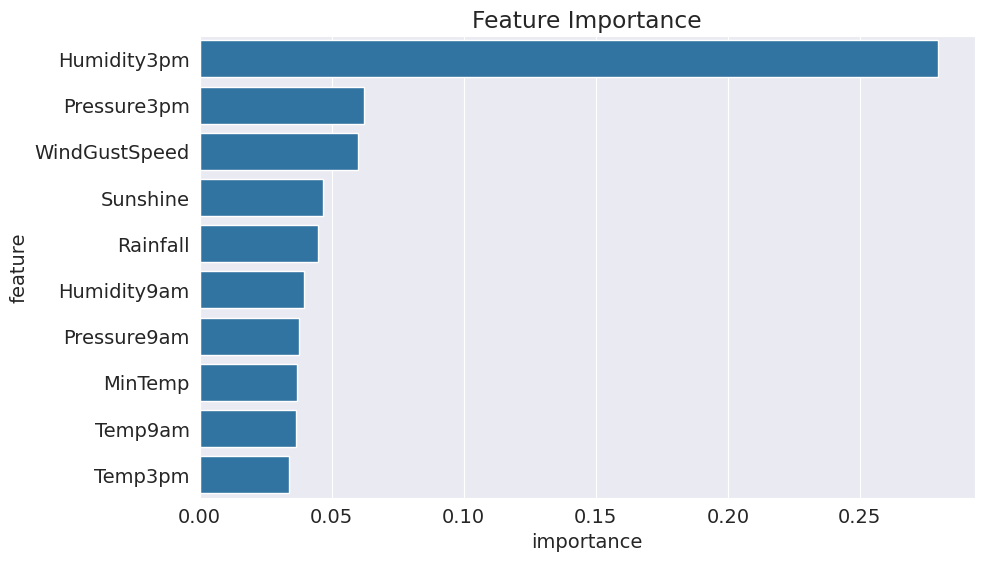

In [99]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

#Ajuste e overfitting de hiperparâmetros

Como vimos na seção anterior, nosso classificador de árvore de decisão memorizou todos os exemplos de treinamento, levando a uma precisão de treinamento de 100%, enquanto a precisão da validação foi apenas marginalmente melhor do que um modelo de linha de base burro. Esse fenômeno é chamado de overfitting e, nesta seção, veremos algumas estratégias para reduzir o overfitting.

#DECISION TREE


O DecisionTreeClassifier aceita vários argumentos, alguns dos quais podem ser modificados para reduzir o sobreajuste.


Esses argumentos são chamados de hiperparâmetros porque devem ser configurados manualmente (ao contrário dos parâmetros dentro do modelo que são aprendidos a partir dos dados. Exploraremos alguns hiperparâmetros

- max_depth

- max_leaf_nodes


#max_depth

`Ao reduzir a profundidade máxima da árvore de decisão, podemos evitar que a árvore memorize todos os exemplos de treinamento`, o que pode levar a uma melhor generalização


In [100]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [101]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

Podemos calcular a precisão do modelo nos conjuntos de treinamento e validação usando model.score



In [102]:
model.score(X_train, train_targets)

0.8315916234640977

In [103]:
model.score(X_val, val_targets)

0.8348060155655685

Ótimo, embora a precisão do treinamento do modelo tenha diminuído, a precisão da validação do modelo aumentou significativamente.

In [104]:
model.classes_

array(['No', 'Yes'], dtype=object)

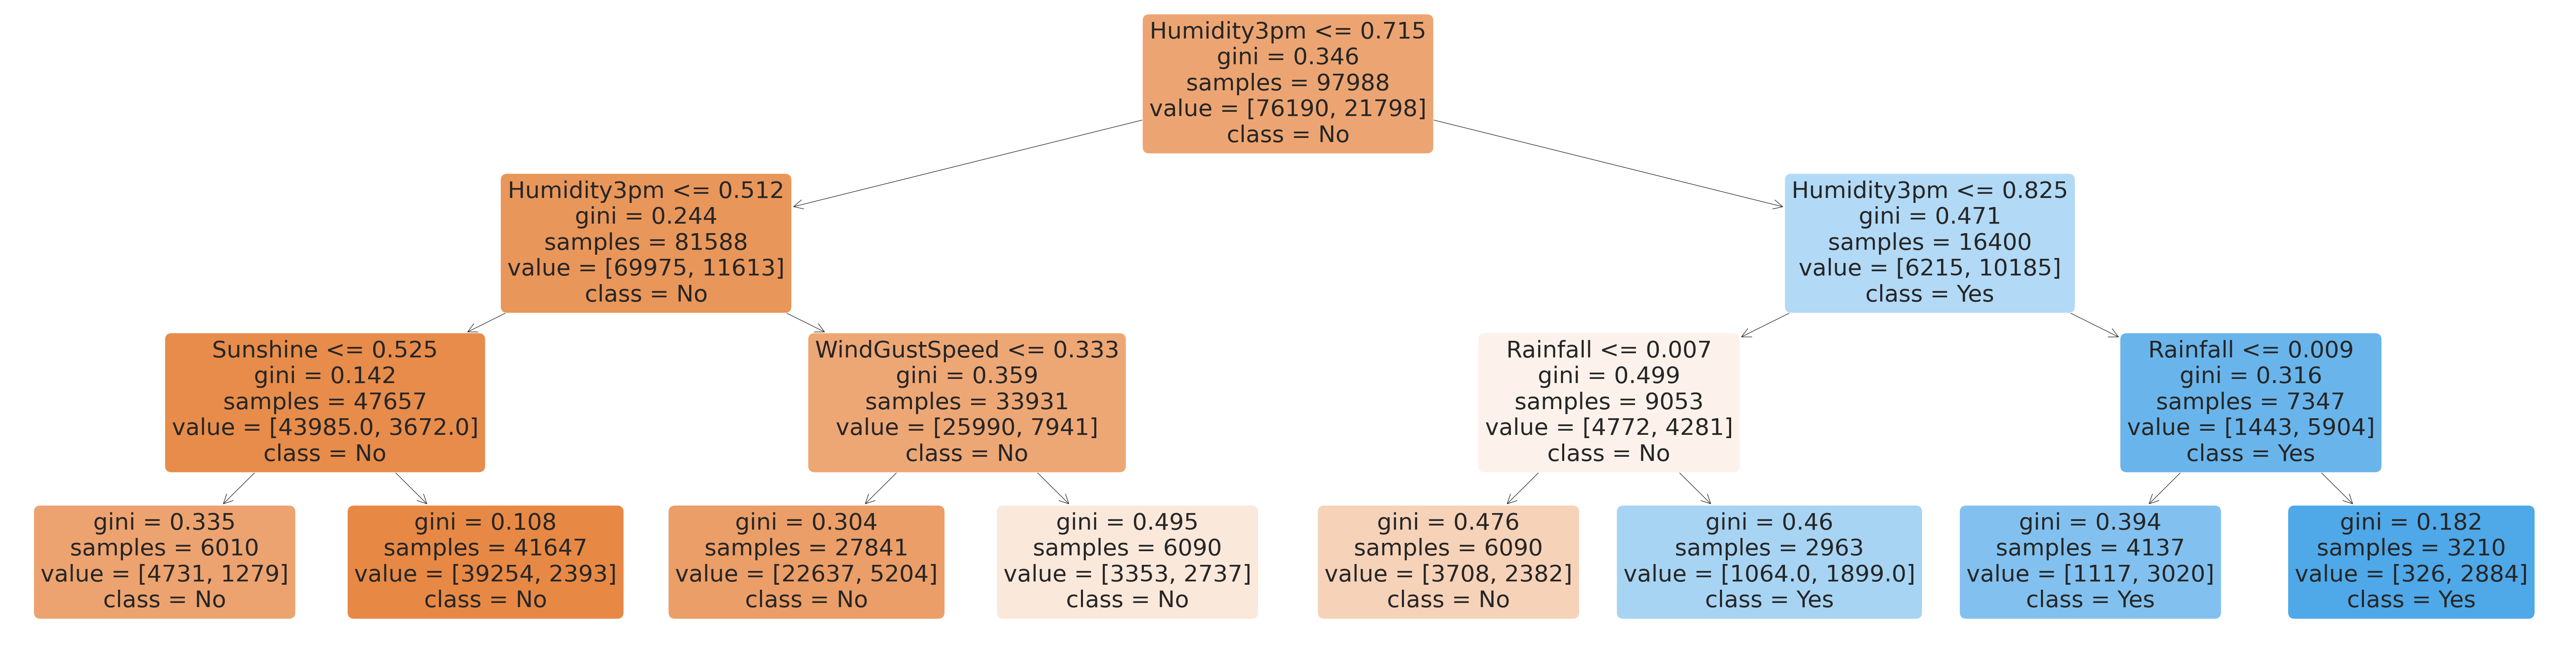

In [105]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

EXERCÍCIO : Estude cuidadosamente o diagrama da árvore de decisão e entenda o que cada um dos termos gini, samples , Value e class significam.


In [106]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.53
|   |   |   |--- class: No
|   |--- Humidity3pm >  0.51
|   |   |--- WindGustSpeed <= 0.33
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.33
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: No
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



Vamos experimentar diferentes profundidades usando uma função auxiliar.

In [107]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [108]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

In [109]:
errors_df

Max Depth  Training Error  Validation Error
0           1        0.181941          0.176488
1           2        0.176930          0.170695
2           3        0.168408          0.165194
3           4        0.162153          0.161624
4           5        0.157244          0.158113
5           6        0.153131          0.155890
6           7        0.149059          0.154661
7           8        0.144814          0.153959
8           9        0.139425          0.154778
9          10        0.131863          0.155246
10         11        0.122923          0.157002
11         12        0.113044          0.159284
12         13        0.102288          0.166247
13         14        0.090807          0.166481
14         15        0.080030          0.170578
15         16        0.068335          0.175961
16         17        0.058119          0.180467
17         18        0.049200          0.180935
18         19        0.041015          0.182515
19         20        0.033698          0.185734

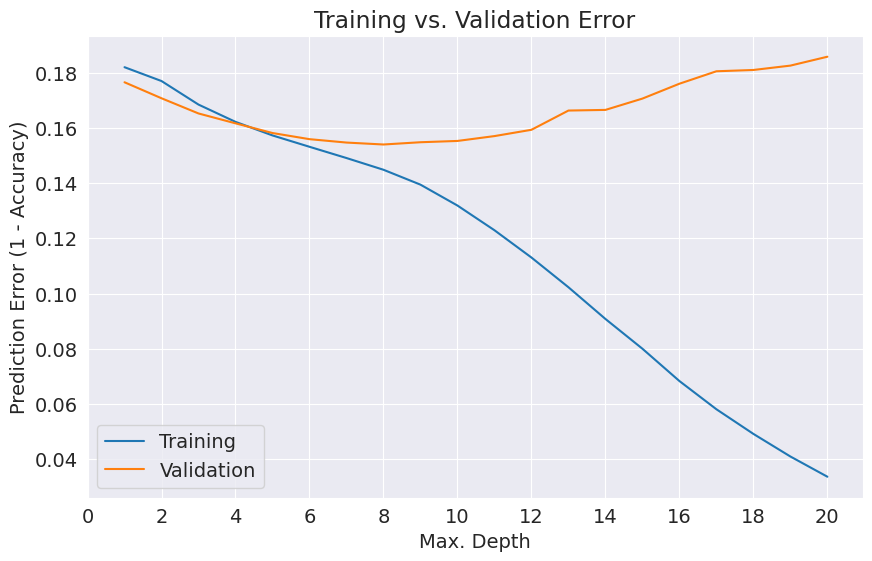

In [110]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

Este é um padrão comum que você verá em todos os algoritmos de aprendizado de máquina:


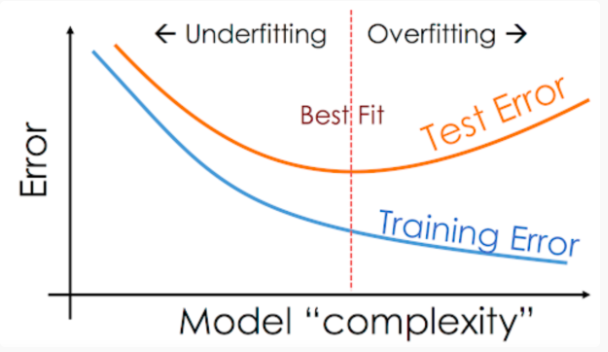

Freqüentemente, você precisará ajustar os hiperparâmetros `cuidadosamente para encontrar o ajuste ideal`. No caso acima, parece que uma profundidade máxima de 7 resulta no menor erro de validação.

In [111]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8453391070279127

#max_leaf_nodes
Outra forma de controlar o tamanho da complexidade de uma árvore de decisão é limitar o número de nós folha. Isso permite que os galhos da árvore tenham profundidades variadas.

In [112]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [113]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [114]:
model.score(X_train, train_targets)

0.852696248520227

In [115]:
model.score(X_val, val_targets)

0.8471531394464276

In [116]:
model.tree_.max_depth

11

Observe que o modelo foi capaz de atingir uma profundidade maior de 11 para determinados caminhos, enquanto manteve outros caminhos mais curtos

In [117]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.24
|   |   |   |   |   |   |--- Sunshine <= 0.37
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.37
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |--- Pressure3pm >  0.44
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Cloud3pm <= 0.39
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- Cloud3pm >  0.39
|   |   |   |   |   |   |   |--- Location_Hobart <= 0.50
|   |   |   |   |   |   |   |   |--- WindGustSpeed <= 0.23
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- WindGustSpeed >  0.23

EXERCÍCIO : Encontre a combinação de max_depthe max_leaf_nodesque resulta na maior precisão de validação.

In [118]:
model = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=100, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8455146585522851

Testei varioos parametros tanto para max_depth como para max_leaf_nodes e os melhores valores encontrados foram estes.

EXERCÍCIO : Uma técnica mais avançada (mas menos comumente usada) para reduzir o overfitting em árvores de decisão é conhecida como poda de complexidade de custo. Saiba mais sobre isso aqui: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html . Implemente a redução da complexidade de custos. Você vê alguma melhoria na precisão da validação?

#Impureza total das folhas vs alfas efetivos da árvore podada

A remoção da complexidade de custo mínimo encontra recursivamente o nó com o “elo mais fraco”.   

O elo mais fraco é caracterizado por um alfa efetivo, `onde os nós com o menor alfa efetivo são podados primeiro`. Para ter uma ideia de quais valores de ccp_alpha poderiam ser apropriados, o scikit-learn fornece DecisionTreeClassifier.cost_complexity_pruning_path que retorna os alfas efetivos e o total de impurezas foliares correspondentes em cada etapa do processo de poda. À medida que o alfa aumenta, mais partes da árvore são podadas, o que aumenta a impureza total de suas folhas.

In [119]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, train_targets)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#No gráfico a seguir, o valor alfa efetivo máximo é removido,
#pois é a árvore trivial com apenas um nó.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

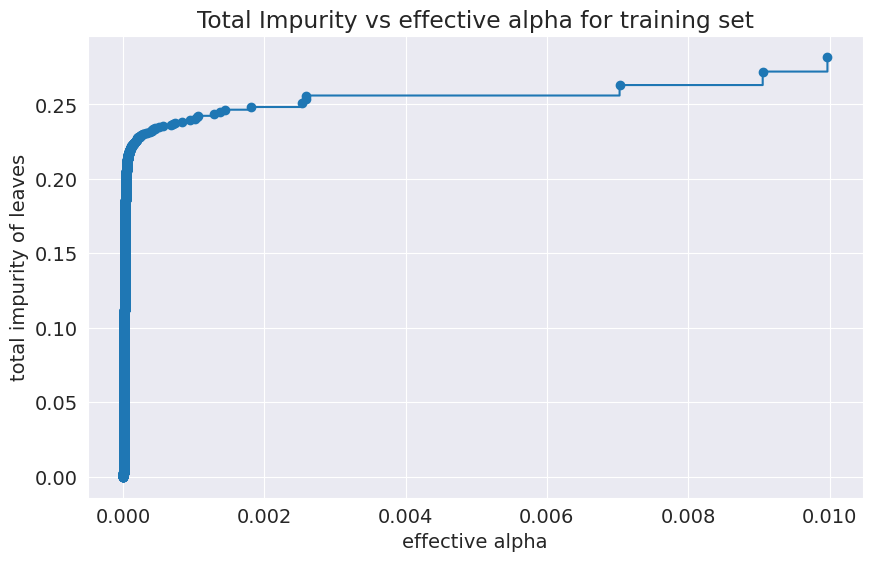

In [120]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

A seguir, treinamos uma árvore de decisão usando os alfas efetivos. O último valor em ccp_alphasé o valor alfa que poda a árvore inteira, deixando a árvore, clfs[-1], com um nó.

#A SESSAO DE PRUNNING FOI MUITO PESADA PARA RODAR SEM GPU. ENTAO, APENAS RODA SE TIVER MAQUINA BOA COM BASTANTE VELOCIDADE.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, train_targets)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Para o restante deste exemplo, removemos o último elemento de clfs e ccp_alphas, porque é a árvore trivial com apenas um nó. Aqui mostramos que o número de nós e a profundidade da árvore diminuem à medida que alfa aumenta.

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Precisão vs alfa para conjuntos de treinamento e teste
Quando ccp_alphaé definido como zero e mantendo os outros parâmetros padrão de DecisionTreeClassifier, a árvore se sobreajusta, levando a uma precisão de treinamento de 100% e uma precisão de teste de 88%. À medida que alfa aumenta, mais árvores são podadas, criando assim uma árvore de decisão que generaliza melhor. Neste exemplo, a configuração ccp_alpha=0.015maximiza a precisão do teste.

In [ ]:
train_scores = [clf.score(X_train, train_targets) for clf in clfs]
test_scores = [clf.score(X_test, test_targets) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#AQUI TERMINA A SESSÃO DE PRUNNING.

#Treinando um RANDOM FOREST
Embora o ajuste dos hiperparâmetros de uma única árvore de decisão possa levar a algumas melhorias, uma estratégia muito mais eficaz é combinar os resultados de várias árvores de decisão treinadas com parâmetros ligeiramente diferentes. Isso é chamado de modelo de floresta aleatório.

`A ideia principal aqui é que cada árvore de decisão na floresta cometerá diferentes tipos de erros e, ao calcular a média, muitos de seus erros serão anulados. Esta ideia também é comumente conhecida como “sabedoria da multidão”`:

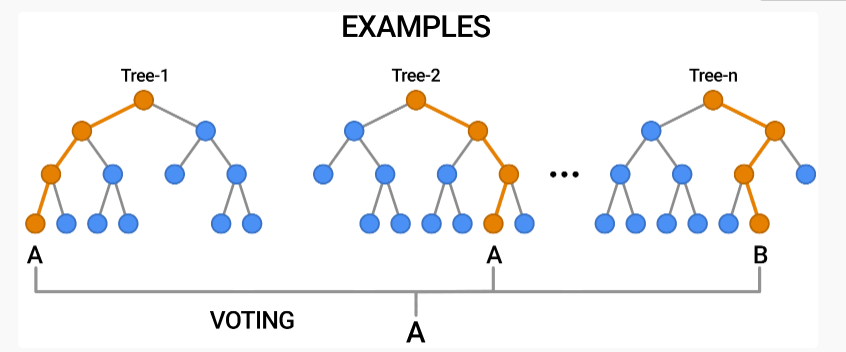

Uma floresta aleatória funciona calculando a média/combinando os resultados de várias árvores de decisão


`Usaremos a RandomForestClassifierclasse from sklearn.ensemble.`

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

n_jobspermite que a floresta aleatória use vários trabalhadores paralelos para treinar árvores de decisão e random_state=42 garante que obtenhamos os mesmos resultados para cada execução.

In [124]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [125]:
model.score(X_train, train_targets)

0.9999795893374699

In [126]:
model.score(X_val, val_targets)

0.8575691965591902

Mais uma vez, a precisão do treinamento é quase 100%, mas desta vez a precisão da validação é muito melhor. Na verdade, é melhor do que a melhor árvore de decisão que treinamos até agora. Você vê o poder das florestas aleatórias?

Esta técnica geral de combinar os resultados de muitos modelos é chamada de "ensembling" e funciona porque a maioria dos erros dos modelos individuais são anulados na média. Aqui está o que parece visualmente:



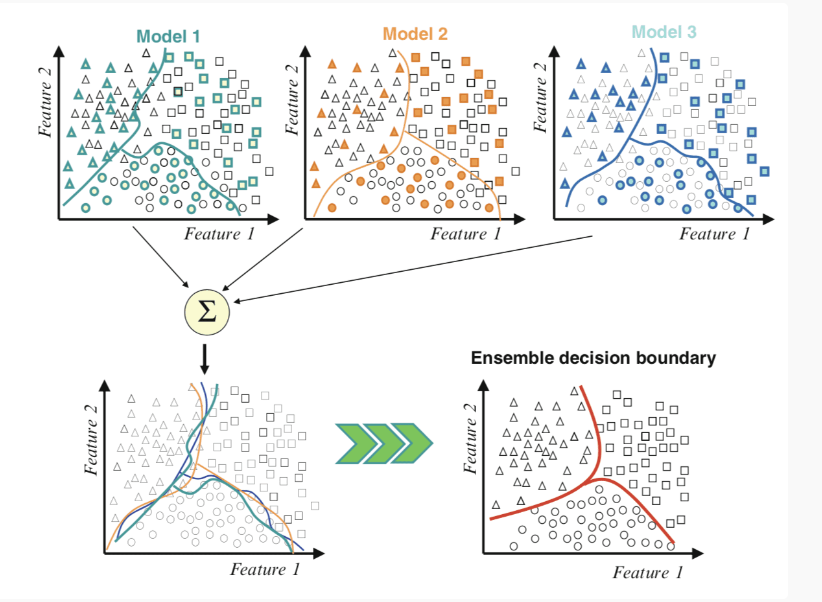

Também podemos observar as probabilidades das previsões. A probabilidade de uma classe é simplesmente a fração de árvores que previu a classe dada.

In [127]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.97, 0.03],
       [1.  , 0.  ],
       [0.98, 0.02],
       ...,
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.96, 0.04]])

Podemos acessar árvores de decisão individuais usando model.estimators_

In [128]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

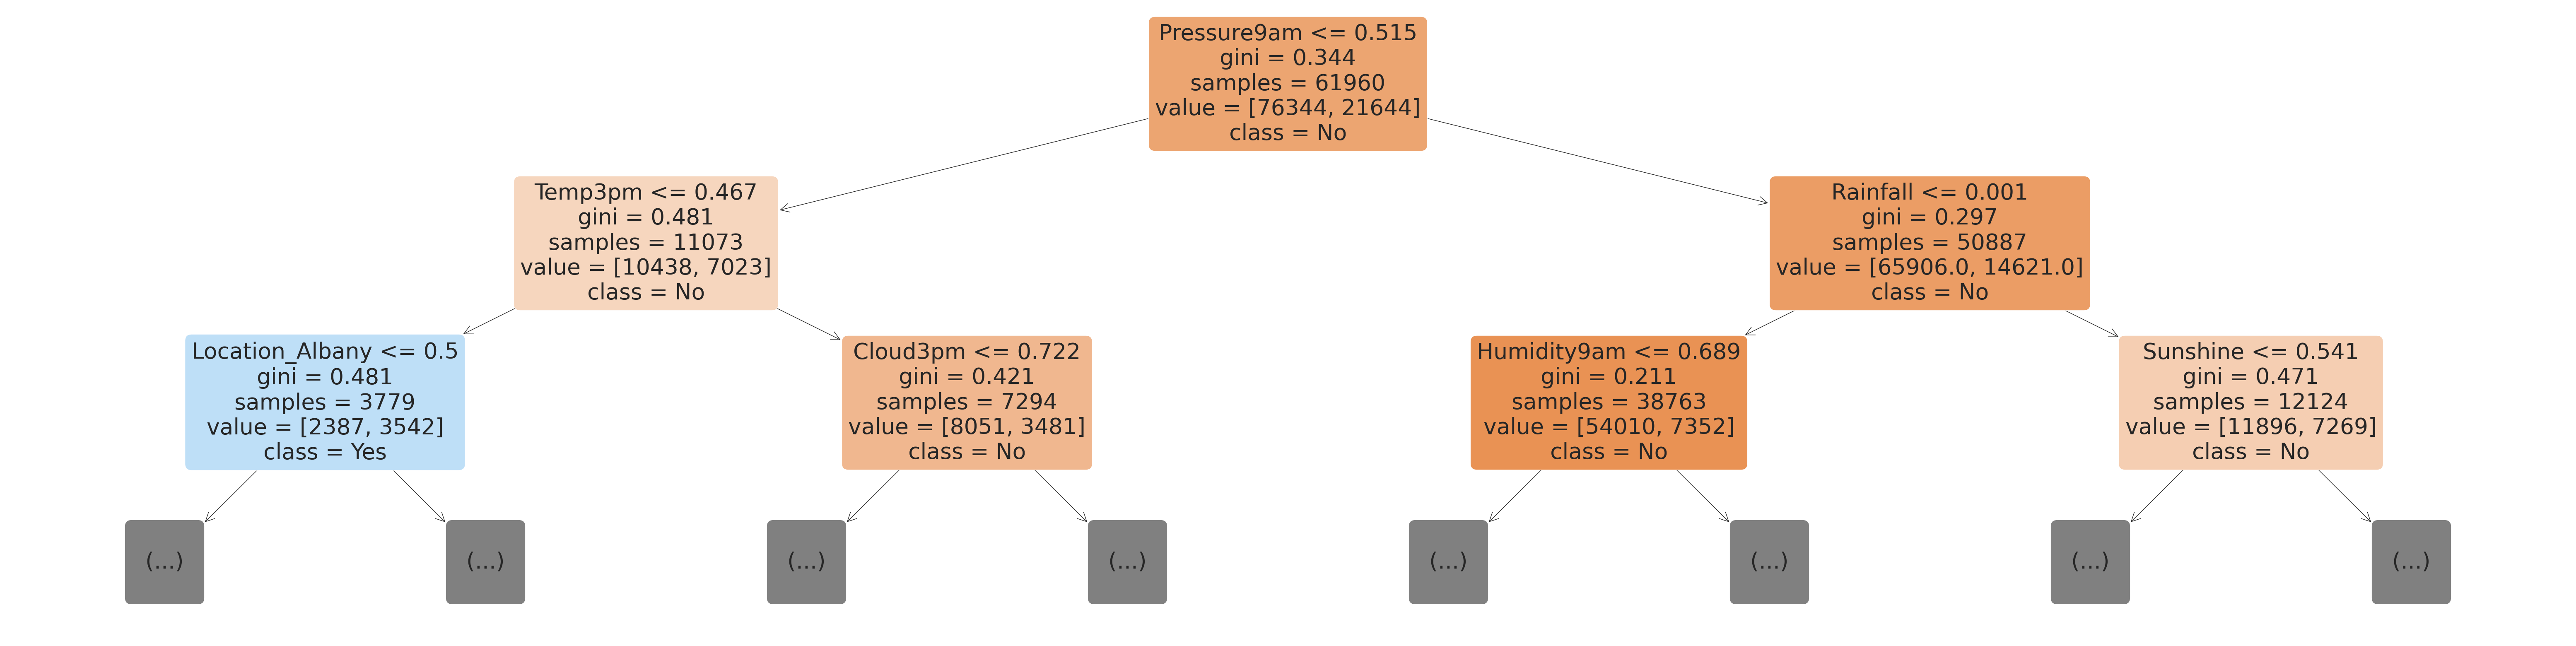

In [129]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

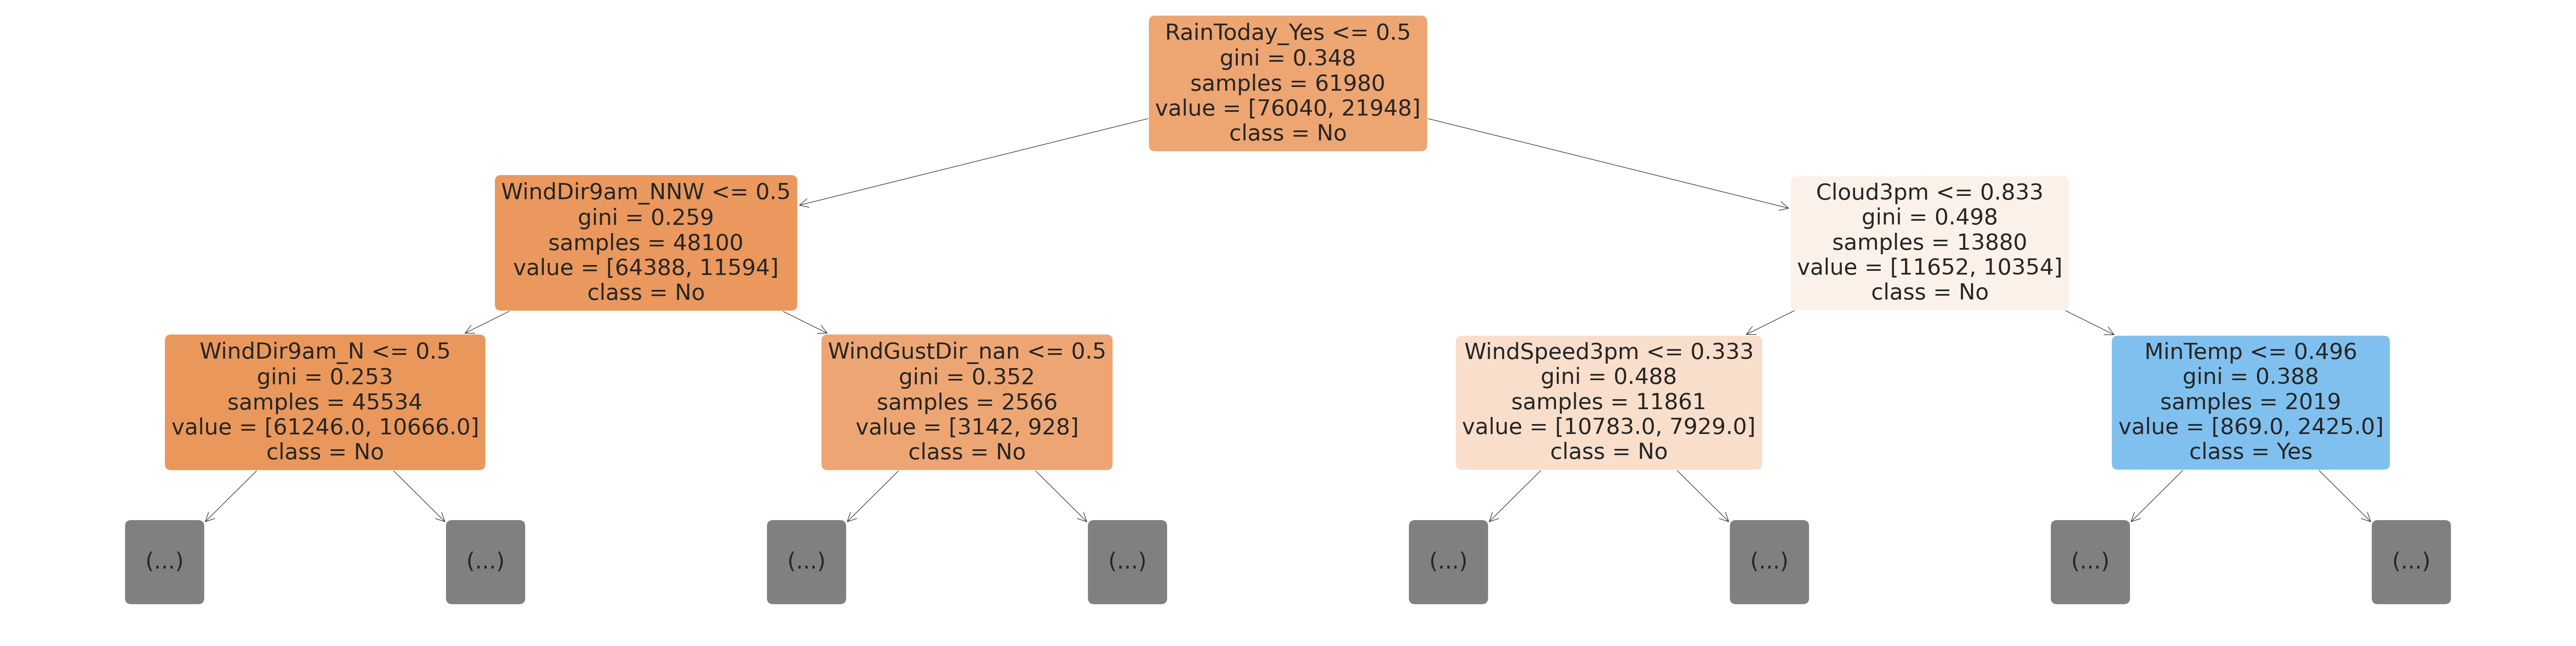

In [130]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [131]:
len(model.estimators_)

100

Assim como as árvores de decisão, as florestas aleatórias também atribuem uma “importância” a cada recurso, combinando os valores de importância de árvores individuais.

In [132]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [133]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.142883
4        Sunshine    0.055793
2        Rainfall    0.054568
11    Pressure3pm    0.052636
10    Pressure9am    0.051457
8     Humidity9am    0.050039
5   WindGustSpeed    0.048500
15        Temp3pm    0.046661
0         MinTemp    0.042474
1         MaxTemp    0.042084

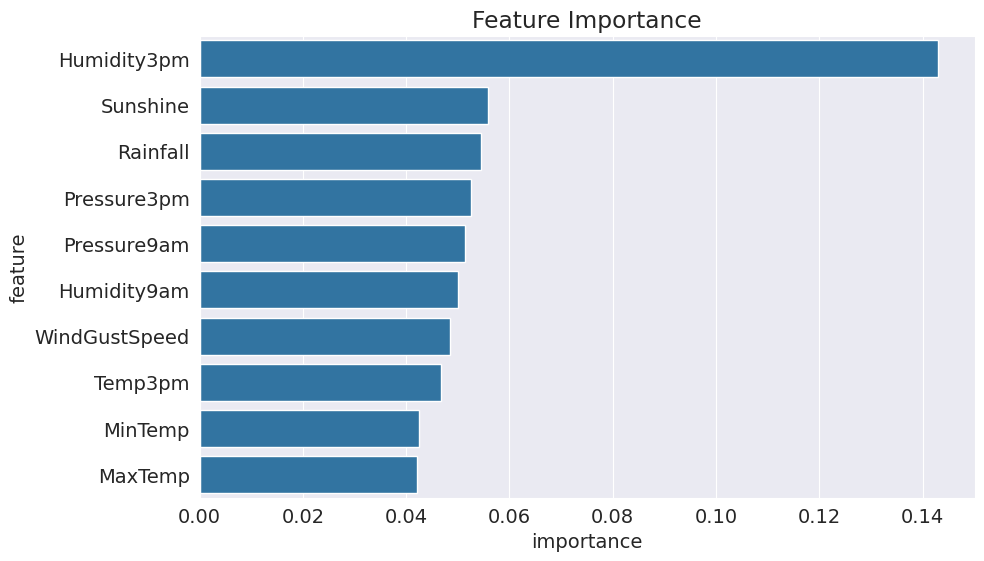

In [134]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Observe que a distribuição é muito menos distorcida do que a de uma única árvore de decisão.


#Ajuste de hiperparâmetros com florestas aleatórias
Assim como as árvores de decisão, as florestas aleatórias também possuem vários hiperparâmetros. Na verdade, muitos desses hiperparâmetros são aplicados às árvores de decisão subjacentes.

Vamos estudar alguns hiperparâmetros para florestas aleatórias. Você pode aprender mais sobre eles aqui: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html